In [10]:
url = 'https://raw.githubusercontent.com/tdoan89/ml-dataset/main/titanic_preprocessed_01.csv'
#extractloading

In [1]:
# Survived or Not-survived
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
titanic_raw = sns.load_dataset('titanic')
#or in this case we can load the database using read_csv as follow as
#tanic_raw = pd.read_csv(url)
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
database = pd.read_csv('./rates.csv')

In [4]:
database.columns.tolist().index('GBP')

48

In [5]:
database.iloc[:,48:49]

,GBP
0,0.70248
1,0.69999
2,0.70587
3,0.70441
4,0.70569
...,...
333,0.82005
334,0.81299
335,0.82232
336,0.82283


In [6]:
database.head()

,Date,LAK,AOA,ANG,NOK,XPF,AFN,MZN,DOP,CZK,...,ALL,LKR,ILA,BRX,INX,CAX,CUC,ISX,HUX,CZX
0,2018-04-14,8276.0,217.610992,1.78,7.77490,96.120003,69.699997,60.000000,49.400002,20.504999,...,104.199997,155.600006,NaN,3.4099,NaN,NaN,NaN,NaN,252.119995,NaN
1,2018-04-13,8276.0,217.610992,1.78,7.75401,96.220001,69.699997,60.250000,49.400002,20.524401,...,104.500000,155.600006,NaN,3.3852,NaN,NaN,NaN,NaN,252.119995,NaN
2,2018-04-12,8276.0,216.432999,1.78,7.78330,96.110001,69.699997,60.400002,49.400002,20.510201,...,104.250000,155.649994,NaN,3.4046,NaN,NaN,NaN,NaN,251.740005,NaN
3,2018-04-11,8279.0,216.608002,1.78,7.77334,95.800003,69.699997,60.599998,49.400002,20.450800,...,104.199997,155.649994,NaN,3.4189,NaN,NaN,NaN,NaN,252.820007,NaN
4,2018-04-10,8279.0,216.436996,1.78,7.82025,96.269997,69.699997,60.799999,49.400002,20.560699,...,104.199997,155.500000,NaN,3.3897,NaN,NaN,NaN,NaN,253.949997,NaN


In [7]:
database.GBP

0      0.70248
1      0.69999
2      0.70587
3      0.70441
4      0.70569
        ...   
333    0.82005
334    0.81299
335    0.82232
336    0.82283
337    0.80853
Name: GBP, Length: 338, dtype: float64

In [11]:
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,...,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,0,3,22.0,1,0,7.2500,1,Southampton,no,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,Cherbourg,yes,0,...,0,1,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,Southampton,yes,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,Southampton,yes,0,...,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,Southampton,no,1,...,1,0,0,0,0,0,0,0,0,1


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survived              891 non-null    int64  
 1   pclass                891 non-null    int64  
 2   age                   889 non-null    float64
 3   sibsp                 891 non-null    int64  
 4   parch                 891 non-null    int64  
 5   fare                  891 non-null    float64
 6   adult_male            891 non-null    int64  
 7   embark_town           889 non-null    object 
 8   alive                 891 non-null    object 
 9   alone                 891 non-null    int64  
 10  fare_zscore           891 non-null    float64
 11  sex_female            891 non-null    int64  
 12  sex_male              891 non-null    int64  
 13  age_cat_(-inf, 12.0]  891 non-null    int64  
 14  age_cat_(12.0, 18.0]  891 non-null    int64  
 15  age_cat_(18.0, 25.0]  8

In [31]:
!pip3 install sklearn

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [14]:
dataset = titanic.drop(columns=['embark_town', 'alive'])
dataset.dropna(inplace=True)
dataset

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,...,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,0,3,22.000000,1,0,7.2500,1,0,-0.910206,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,71.2833,0,0,1.368848,1,...,0,1,0,0,1,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,1,-0.821443,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1.075214,1,...,0,1,0,0,1,0,0,0,0,0
4,0,3,35.000000,0,0,8.0500,1,1,-0.805838,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,-0.327946,0,...,1,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,0,1,0.505885,1,...,0,1,0,1,0,0,0,0,0,0
888,0,3,31.716561,1,2,23.4500,0,0,0.260270,1,...,0,1,0,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0.505885,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
X, y = dataset.drop(columns = 'survived'),dataset['survived']
display(X, y)

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,...,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,3,22.000000,1,0,7.2500,1,0,-0.910206,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,0,0,1.368848,1,0,...,0,1,0,0,1,0,0,0,0,0
2,3,26.000000,0,0,7.9250,0,1,-0.821443,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1.075214,1,0,...,0,1,0,0,1,0,0,0,0,0
4,3,35.000000,0,0,8.0500,1,1,-0.805838,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,1,-0.327946,0,1,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,0,1,0.505885,1,0,...,0,1,0,1,0,0,0,0,0,0
888,3,31.716561,1,2,23.4500,0,0,0.260270,1,0,...,0,1,0,0,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0.505885,0,1,...,1,0,0,0,1,0,0,0,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=420)

In [21]:
x_train

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,...,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
814,3,30.500000,0,0,8.0500,1,1,-0.805838,0,1,...,1,0,0,0,0,0,0,0,0,1
722,2,34.000000,0,0,13.0000,1,1,-0.327946,0,1,...,1,0,0,0,0,0,0,0,0,1
248,1,37.000000,1,1,52.5542,1,0,1.064912,0,1,...,1,0,0,0,0,1,0,0,0,0
683,3,14.000000,5,2,46.9000,0,0,0.951413,0,1,...,0,0,0,0,0,0,0,0,0,1
657,3,32.000000,1,1,15.5000,0,0,-0.152564,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3,40.500000,0,2,14.5000,1,0,-0.219063,0,1,...,1,0,0,0,0,0,0,0,0,1
155,1,51.000000,0,1,61.3792,1,0,1.219689,0,1,...,1,0,0,0,0,0,0,0,0,1
129,3,45.000000,0,0,6.9750,1,1,-0.948764,0,1,...,1,0,0,0,0,0,0,0,0,1
713,3,29.000000,0,0,9.4833,1,1,-0.642451,0,1,...,1,0,0,0,0,0,0,0,0,1


In [22]:
x_test

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,...,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
366,1,60.000000,1,0,75.2500,0,0,1.422845,1,0,...,0,1,0,0,0,1,0,0,0,0
377,1,27.000000,0,2,211.5000,1,0,2.453267,0,1,...,1,0,0,0,1,0,0,0,0,0
803,3,0.420000,0,1,8.5167,0,0,-0.749644,0,1,...,0,0,0,0,0,0,0,0,0,1
491,3,21.000000,0,0,7.2500,1,1,-0.910206,0,1,...,1,0,0,0,0,0,0,0,0,1
116,3,70.500000,0,0,7.7500,1,1,-0.843708,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,1,24.000000,0,0,69.3000,0,1,1.340712,1,0,...,0,1,0,1,0,0,0,0,0,0
547,2,34.960938,0,0,13.8625,1,1,-0.263894,0,1,...,1,0,0,0,0,0,0,0,0,1
704,3,26.000000,1,0,7.8542,1,0,-0.830391,0,1,...,1,0,0,0,0,0,0,0,0,1
873,3,47.000000,0,0,9.0000,1,1,-0.694608,0,1,...,1,0,0,0,0,0,0,0,0,1


In [23]:
from sklearn.tree import DecisionTreeClassifier
clr = DecisionTreeClassifier() # Định nghĩa một mô hình
clr.fit(x_train, y_train) # Huấn luyện mô hình

DecisionTreeClassifier()

In [24]:
y_pred = clr.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [25]:
accuracy_score(y_test, y_pred)*100

79.21348314606742

In [26]:
plot_confusion_matrix(clr, x_test, y_test)

In [27]:
precision_score(y_test, y_pred)*100

72.46376811594203

In [28]:
1 - 21/(21 + 52)

0.7123287671232876

In [29]:
f1_score(y_test, y_pred)

0.7299270072992701

In [30]:
# Data Wrangling # Wrangler # CSV # JSON # Web

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred),square = True)

<AxesSubplot:>

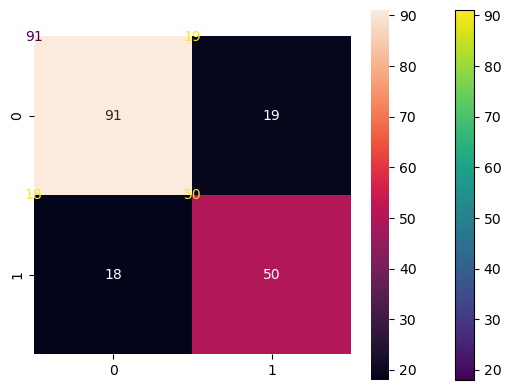

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True, cbar=False)
plt.show()